# Procesamiento Digital de Imagenes - TP6


### Functions and libraries

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import ndimage
from scipy import stats
import scipy.signal

RGB to YIQ and YIQ to RGB

In [2]:
MAT_YIQ = np.array([[0.299, 0.595716, 0.211456],
                    [0.587, -0.274453, -0.522591],
                    [0.114, -0.321263, 0.311135]])

In [3]:
def rgb2yiq(_im):
    _rgb = _im.reshape((-1,3))
    _yiq = _rgb @ MAT_YIQ
    _yiq = _yiq.reshape(_im.shape)
    return _yiq

In [4]:
def yiq2rgb(_im):
    return (_im.reshape((-1, 3)) @ np.linalg.inv(MAT_YIQ)).reshape(_im.shape)

### Dilation

In [5]:
def im_dilate(image, structuring_element):
    # convolution output
    output = np.zeros_like(image)
    pad_width = structuring_element.shape[0] - 2

    # pad the matrix with `pad_width`
    image_padded = np.pad(array = image, pad_width = pad_width, mode = 'constant')

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise
            output[y, x] = np.max( np.multiply(structuring_element, image_padded[y: y+structuring_element.shape[1], x: x+structuring_element.shape[0]]) )

    return output

In [6]:
def color_im_dilate(image, structuring_element):
  image_yiq = rgb2yiq(image)
  image_yiq[:,:,0] = im_dilate(image_yiq[:,:,0], structuring_element)
  return yiq2rgb(image_yiq)

### Erosion

In [7]:
def im_erode(image, structuring_element):
    # convolution output
    output = np.zeros_like(image)
    pad_width = structuring_element.shape[0] - 2

    # pad the matrix with `pad_width`
    image_padded = np.pad(array = image, pad_width = pad_width, mode = 'constant')

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise
            output[y, x] = np.min( np.multiply(structuring_element, image_padded[y: y+structuring_element.shape[1], x: x+structuring_element.shape[0]]) )

    return output

In [8]:
def color_im_erode(image, structuring_element):
  image_yiq = rgb2yiq(image)
  image_yiq[:,:,0] = im_erode(image_yiq[:,:,0], structuring_element)
  return yiq2rgb(image_yiq)

### Median

In [9]:
def im_median(image, structuring_element):
    # convolution output
    output = np.zeros_like(image)
    pad_width = structuring_element.shape[0] - 2

    # pad the matrix with `pad_width`
    image_padded = np.pad(array = image, pad_width = pad_width, mode = 'constant')

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise
            output[y, x] = np.median( np.multiply(structuring_element, image_padded[y: y+structuring_element.shape[1], x: x+structuring_element.shape[0]]) )

    return output

In [10]:
def color_im_median(image, structuring_element):
  image_yiq = rgb2yiq(image)
  image_yiq[:,:,0] = im_median(image_yiq[:,:,0], structuring_element)
  return yiq2rgb(image_yiq)

### External border

In [11]:
def im_border_ext(image, structuring_element):
  return im_dilate(image, structuring_element) - image

### Internal border

In [12]:
def im_border_int(image, structuring_element):
  return image - im_erode(image, structuring_element)

### Gradient

In [13]:
def im_gradient(image, structuring_element):
  return im_dilate(image, structuring_element) - im_erode(image, structuring_element)

### Opening

In [14]:
def im_open(image, structuring_element):
  return im_dilate(im_erode(image, structuring_element), structuring_element )

### Closing

In [15]:
def im_close(image, structuring_element):
  return im_erode(im_dilate(image, structuring_element), structuring_element )

### Top hat

In [16]:
def im_tophat(image, structuring_element):
  return image - im_open(image, structuring_element)

### Bottom hat

In [17]:
def im_bottomhat(image, structuring_element):
  return im_close(image, structuring_element) - image

### Open-close

In [18]:
def im_OC(image, structuring_element):
  return im_close(im_open(image, structuring_element), structuring_element)

### Close-open

In [19]:
def im_CO(image, structuring_element):
  return im_open(im_close(image, structuring_element), structuring_element)

### Smoothing

In [20]:
def im_smooth(image, structuring_element):
  return  (1/2) *( im_open(image, structuring_element) + im_close(image, structuring_element) )

## Starting snippet

### Basic operators grayscale

#### 3x3 box

Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (136 kB)
Downloading: 8192/139512 bytes (5.9%)139512/139512 bytes (100.0%)
  Done
File saved as /root/.imageio/images/camera.png.


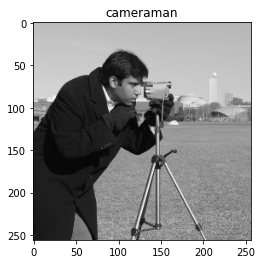

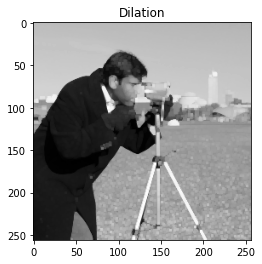

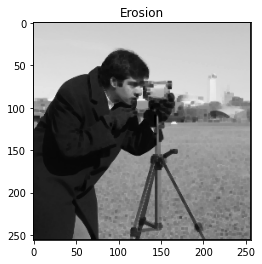

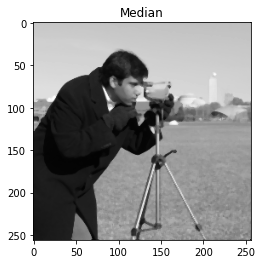

In [21]:
se = np.ones((3,3),np.bool)
im = ndimage.zoom(imageio.imread('imageio:camera.png')/255.,1/2)

plt.imshow(im, 'gray')
plt.title('cameraman')
plt.show()

plt.imshow(im_dilate(im, se), 'gray')
plt.title('Dilation')
plt.show()

plt.imshow(im_erode(im, se),'gray')
plt.title('Erosion')
plt.show()

plt.imshow(im_median(im, se),'gray')
plt.title('Median')
plt.show()

#### 7x7 box

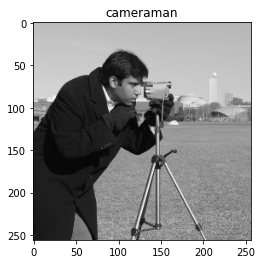

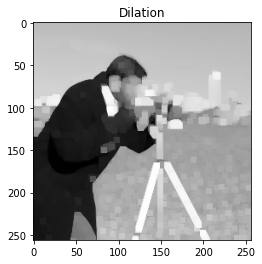

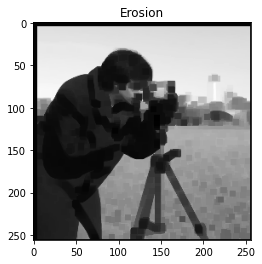

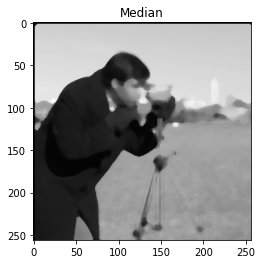

In [22]:
se = np.ones((7,7),np.bool)
im = ndimage.zoom(imageio.imread('imageio:camera.png')/255.,1/2)

plt.imshow(im, 'gray')
plt.title('cameraman')
plt.show()

plt.imshow(im_dilate(im, se), 'gray')
plt.title('Dilation')
plt.show()

plt.imshow(im_erode(im, se),'gray')
plt.title('Erosion')
plt.show()

plt.imshow(im_median(im, se),'gray')
plt.title('Median')
plt.show()

### Derived operators

#### First level (addition / subtraction of erosion and dilation)

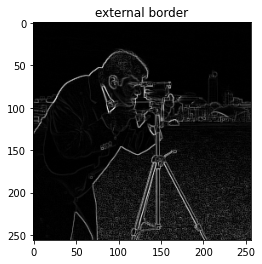

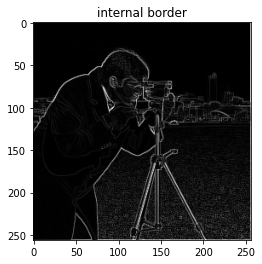

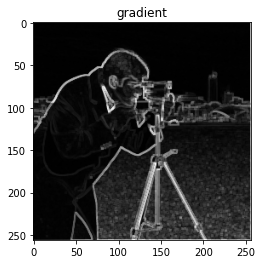

In [23]:
se = np.ones((3,3),np.bool)

plt.imshow(im_border_ext(im, se),'gray')
plt.title('external border')
plt.show()

plt.imshow(im_border_int(im, se),'gray')
plt.title('internal border')
plt.show()

plt.imshow(im_gradient(im, se),'gray')
plt.title('gradient')
plt.show()

#### Second level (concatenation of erosion and dilation)

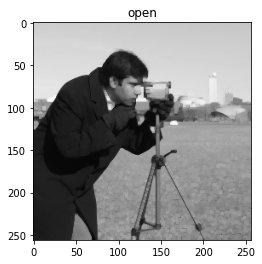

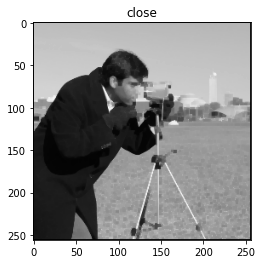

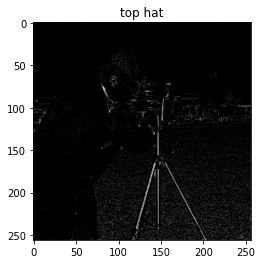

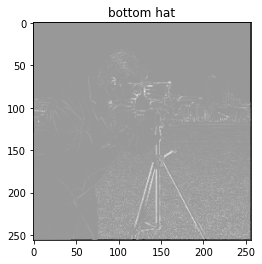

In [24]:
se = np.ones((3,3),np.bool)

plt.imshow(im_open(im, se),'gray')
plt.title('open')
plt.show()

plt.imshow(im_close(im, se),'gray')
plt.title('close')
plt.show()

plt.imshow(im_tophat(im, se),'gray')
plt.title('top hat')
plt.show()

plt.imshow(im_bottomhat(im, se),'gray')
plt.title('bottom hat')
plt.show()

#### Third level (concatenation of opening and closing)

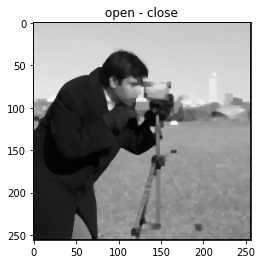

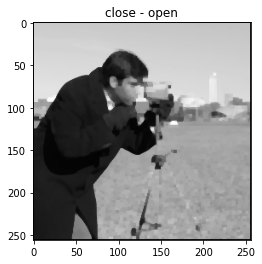

In [25]:
se = np.ones((3,3),np.bool)

plt.imshow(im_OC(im, se),'gray')
plt.title('open - close')
plt.show()

plt.imshow(im_CO(im, se),'gray')
plt.title('close - open')
plt.show()

### Compound functions 

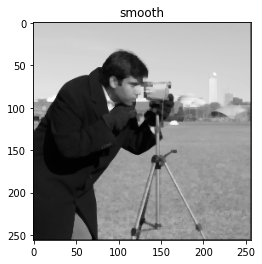

In [26]:
se = np.ones((3,3),np.bool)

plt.imshow(im_smooth(im, se),'gray')
plt.title('smooth')
plt.show()

### Color examples

#### Basic operators

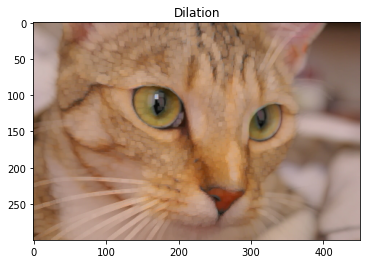

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


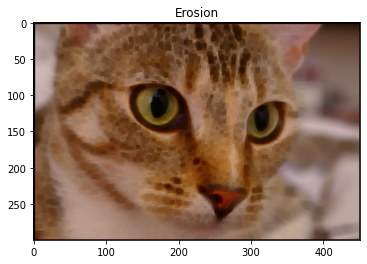

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


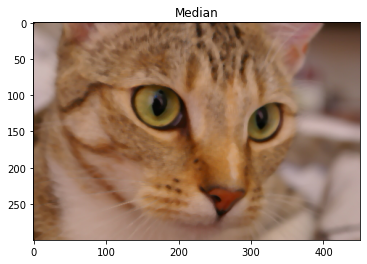

In [27]:
se = np.ones((5,5),np.bool)
im = imageio.imread('imageio:chelsea.png')/255.

plt.imshow(color_im_dilate(im, se),'gray')
plt.title('Dilation')
plt.show()

plt.imshow(color_im_erode(im, se),'gray')
plt.title('Erosion')
plt.show()

plt.imshow(color_im_median(im, se),'gray')
plt.title('Median')
plt.show()